#### Predict the daily bike share data (predict the next sequence of data based on the training data) using RNN architecture Many to One Architecture.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
df = pd.read_csv('daily-bike-share.csv')
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439


In [3]:
df.shape

(731, 14)

In [4]:
df.rentals.describe().round(1)

count     731.0
mean      848.2
std       686.6
min         2.0
25%       315.5
50%       713.0
75%      1096.0
max      3410.0
Name: rentals, dtype: float64

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals'],
      dtype='object')

In [7]:
# Select features and target
features = ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','rentals']

target = 'rentals'

In [8]:
X = df[features].values
y = df[target].values.reshape(-1, 1)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Print shapes of the datasets
print(f"X_train shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test_scaled.shape}, y_test shape: {y_test.shape}")

X_train shape: (584, 13), y_train shape: (584, 1)
X_test shape: (147, 13), y_test shape: (147, 1)


#### Prepare the Data for Many-to-One RNN

In [12]:
# Function to create sequences for Many-to-One RNN
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [13]:
# Choose number of time steps
time_steps = 10

In [14]:
# Create sequences for training data
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)

In [15]:
# Create sequences for test data
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

In [16]:
# Create sequences for test data
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

#### Design and Train the Many-to-One RNN Model
Design and train a SimpleRNN model using TensorFlow/Keras.

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [18]:
# Define the Many-to-One RNN model
model = Sequential([
    SimpleRNN(units=50, activation='relu', input_shape=(time_steps, X_train_seq.shape[2])),
    Dense(units=1)
])

C:\Users\saura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [20]:
# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1430117.3750 - mae: 940.0836 - val_loss: 1111049.0000 - val_mae: 836.4293
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1189477.1250 - mae: 831.7592 - val_loss: 1108007.8750 - val_mae: 834.5966
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1313858.8750 - mae: 878.4171 - val_loss: 1074817.3750 - val_mae: 814.2344
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1317610.2500 - mae: 864.8121 - val_loss: 477021.2500 - val_mae: 523.8668
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 565191.7500 - mae: 584.3591 - val_loss: 481424.6562 - val_mae: 511.2191
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 620043.4375 - mae: 568.3470 - val_loss: 459136.2812 - val_mae: 509.7617
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 467773.0000 - mae: 498.9859 - val_loss: 521393.0000 - val_mae: 597.1507
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 557999.7500 - mae: 584.2

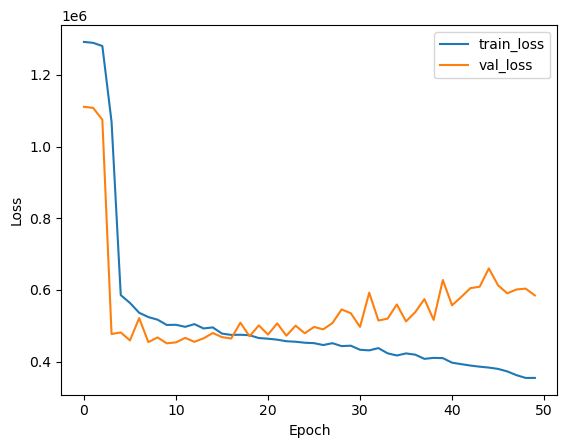

In [21]:
# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# Use the trained model to predict the next sequence of data (Many-to-One prediction)
predicted_values = []

# Start with the last sequence from the training data
current_sequence = X_test_seq[-1]

# Number of future time steps to predict
future_steps = 3

In [23]:
for i in range(future_steps):
    # Reshape the current sequence for prediction (1, time_steps, num_features)
    current_sequence = current_sequence.reshape((1, time_steps, X_train_seq.shape[2]))
    
    # Predict the next value
    next_pred = model.predict(current_sequence)[0, 0]
    
    # Append the predicted value to the list
    predicted_values.append(next_pred)
    
    # Shift the current sequence to include the predicted value
    current_sequence = np.roll(current_sequence, -1, axis=1)
    current_sequence[0, -1] = next_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


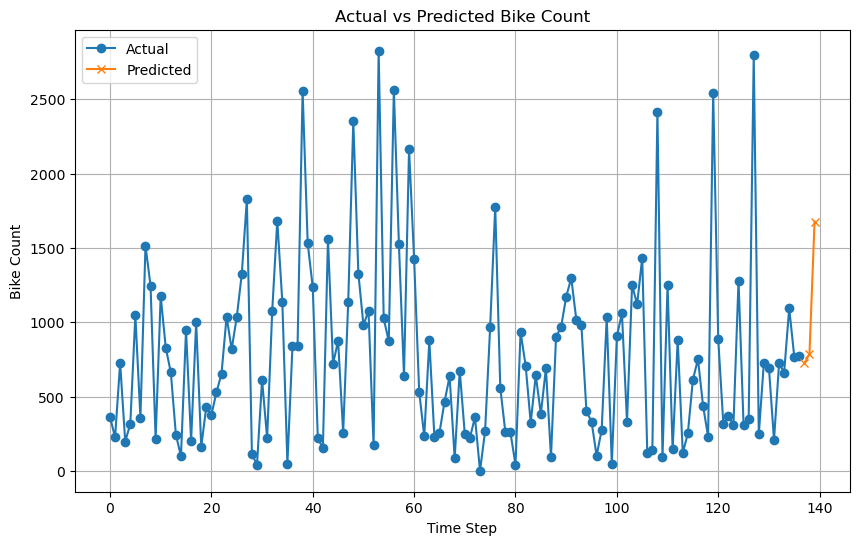

In [24]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_seq)), y_test_seq, label='Actual', marker='o')
plt.plot(np.arange(len(y_test_seq), len(y_test_seq) + future_steps), predicted_values, label='Predicted', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Bike Count')
plt.title('Actual vs Predicted Bike Count')
plt.legend()
plt.grid(True)
plt.show()